COVID VACCINE VISUALIZATION


In [1043]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams


%matplotlib inline

Loading Dataset

In [1044]:
data= pd.read_csv('country_vaccinations.csv')

In [1045]:
data['Year']=  data['date'].str.extract(r'^(\d{4})', expand = False)

In [1046]:
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,Year
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...,2021
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...,2021
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...,2021
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...,2021
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...,2021


In [1047]:
vaccines = data.vaccines.value_counts()

BarPlot for Different Vaccine Type Count

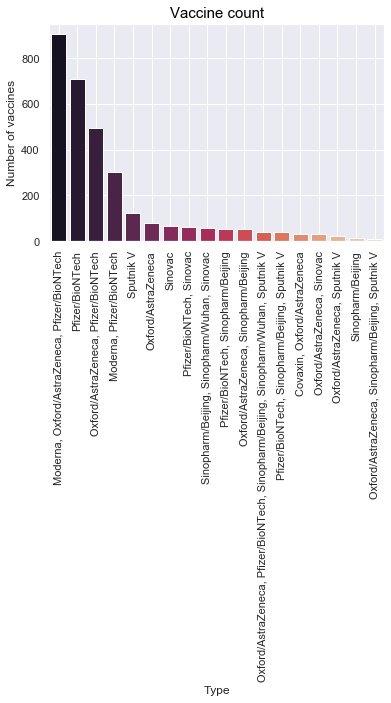

In [1062]:
sns.barplot(x = vaccines.index, y = vaccines.values, palette='rocket')
plt.xticks(rotation = 90)
plt.title('Vaccine count', color = 'Black', size = 15)
plt.ylabel('Number of vaccines')
plt.xlabel('Type')
plt.grid()


In [1049]:
data['Sum'] = data.groupby(['country'])['total_vaccinations'].transform('sum')

In [1050]:
countries = ['England', 'Spain', 'Italy','United States','Germany', 'Turkey']


In [1051]:
Data1 = data.loc[data['country'].isin(countries)] 


In [1052]:
Data1 = Data1[['country','Sum','vaccines']]

In [1053]:
Data1.head()

,country,Sum,vaccines
847,England,244425767.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
848,England,244425767.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
849,England,244425767.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
850,England,244425767.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
851,England,244425767.0,"Oxford/AstraZeneca, Pfizer/BioNTech"


In [1054]:
Data1 =  Data1.drop_duplicates(['Sum'])

In [1055]:
Data1.head()

,country,Sum,vaccines
847,England,244425767.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
1063,Germany,77754621.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
1489,Italy,65390294.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
2648,Spain,35692308.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
2799,Turkey,56851669.0,Sinovac


Barplot for (Total Vaccinations administered)Accumulated

Text(0.5, 0, 'Country')

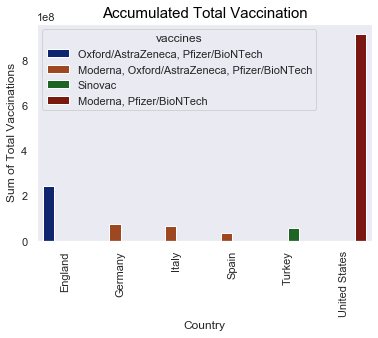

In [1061]:
sns.barplot(hue = Data1.vaccines,x = Data1.country ,y = Data1.Sum, palette= 'dark' )
plt.xticks(rotation = 90)
plt.title('Accumulated Total Vaccination', color = 'Black', size = 15)
plt.ylabel('Sum of Total Vaccinations')
plt.xlabel('Country')



Relplot for total vaccinations over time

In [1057]:
Data2 = data.loc[data['country'].isin(countries)] 


In [1058]:
Data2.date.str.split('-')

847     [2020, 12, 13]
848     [2020, 12, 14]
849     [2020, 12, 15]
850     [2020, 12, 16]
851     [2020, 12, 17]
             ...      
3014    [2021, 02, 09]
3015    [2021, 02, 10]
3016    [2021, 02, 11]
3017    [2021, 02, 12]
3018    [2021, 02, 13]
Name: date, Length: 286, dtype: object

In [1059]:
pd.to_datetime(Data2['date'])

847    2020-12-13
848    2020-12-14
849    2020-12-15
850    2020-12-16
851    2020-12-17
          ...    
3014   2021-02-09
3015   2021-02-10
3016   2021-02-11
3017   2021-02-12
3018   2021-02-13
Name: date, Length: 286, dtype: datetime64[ns]

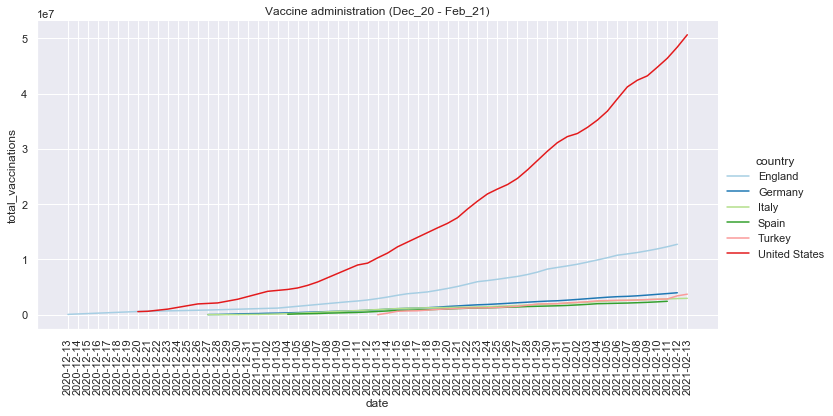

In [1060]:
g = sns.relplot(x = Data2['date'], y = Data2['total_vaccinations'], kind = 'line',hue = Data2.country, aspect = 2)
plt.title('Vaccine administration (Dec_20 - Feb_21)')
plt.xticks(rotation = 90)
plt.grid()
